# Assignment


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/Users/sonikakhanna/Downloads/players_22 - players_22.csv')

/var/folders/cf/6twhyzx56xj6q56wvg1n5qwm0000gn/T/ipykernel_87547/4157581080.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/sonikakhanna/Downloads/players_22 - players_22.csv')


In [7]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


Well, not everyone plays football or knows everything about it, so i will write some clarifications.

In football, player positions corresponds to these positions:-

![](https://www.fifplay.com/img/public/positions.jpg)

In this dataset, you have 1 row each for every football player in the game FIFA 22, For every player we have :-
- Name
- Weight
- Height
- Salary
- Overall (This is an overall score of how good the player is)
- Potential (In FIFA, if you play career mode, players evolve and their overall scores improve, potential refers to how good a player can get, not what he is currently)

Then we have most other options like:-
- Heading (How well can the player head the ball)
- Standing tackle (How well can the player do a standing tackle - defense)
- Sliding tackle (How well can the player do a sliding tackle - defense)

And many many more

# Question 

This dataset is very rich, meaning you can get a lot of insights from this data. 

So, i have 2 questions for you. 
1. Open ended
    - Give me some insights from this data. (Totally open ended, dazzle me with your brilliance ^_^ )
2. You are hired by Real Madrid, and they want you to scout the best players possible
    - They are looking young players, not over 26
    - They are looking for 4 players
        - 1 for Goalkeeper 
        - 1 Defender (Could be any position)
        - 1 Midfielder (Could be any position)
        - 1 Attacker (Could be any position)
        


![](https://media.tenor.com/GFVJq3zf6GYAAAAC/dazzle-me-virgil-van-cleef.gif)

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#insights

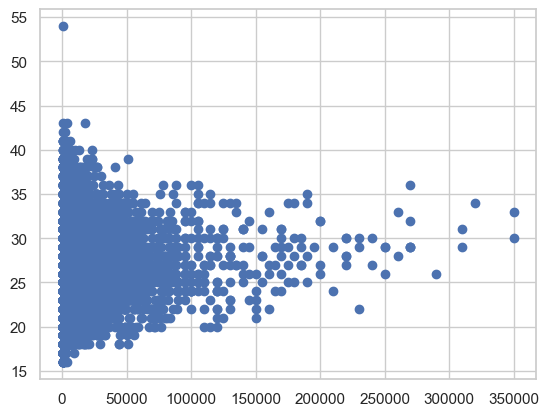

In [39]:
plt.scatter(df['wage_eur'],df['age'])

In [ ]:
the maximum age of 25-35 are more with highest paid salary and their demand is also high

In [42]:
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential',
         'club_name', 'value_eur', 'wage_eur', 'player_positions']]

In [44]:
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)

In [ ]:
for the analysis part have used only these coloums 

In [ ]:
now i have sorted all the values which i think is neccasry in analysis part

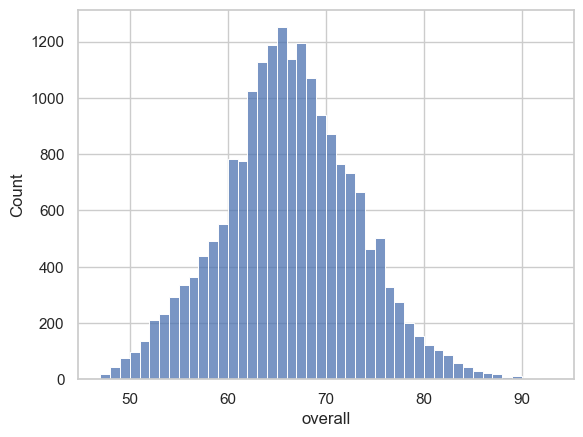

In [23]:
sns.histplot(df, x='overall', binwidth=1)
sns.set_theme()
sns.set_theme(style="whitegrid")

In [ ]:
most players have rating of 65 and 67, ratings with higher psoition is considered

In [57]:
def best_squad(nationality):
    df_best_squad = df.copy()
    df_best_squad = df_best_squad.groupby(['nationality_name', 'player_positions']).head(2)
    df_best_squad = df_best_squad[df_best_squad['nationality_name']==nationality].sort_values(['player_positions', 'overall', 'potential'], ascending=False)
    return df_best_squad

In [ ]:
so first i have created the team for nationals named it best squad, and sorted it

In [58]:
best_squad('Brazil')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
888,Alan Kardec,32,Brazil,77,77,Shenzhen FC,8500000.0,15000.0,"ST, RW, LW"
7443,Lincoln,20,Brazil,68,78,Vissel Kobe,2700000.0,4000.0,"ST, RW, LW"
2831,Ricardo Lopes,30,Brazil,73,73,Shanghai Port FC,3000000.0,21000.0,"ST, RW"
3302,Diego Oliveira,31,Brazil,72,72,FC Tokyo,2000000.0,10000.0,"ST, RW"
3422,Erik,26,Brazil,72,73,Changchun Yatai FC,2800000.0,9000.0,"ST, RM, LM"
...,...,...,...,...,...,...,...,...,...
2368,Junior Messias,30,Brazil,74,74,AC Milan,4100000.0,12000.0,"CAM, CF, CM"
1040,Claudio Coíntra,25,Brazil,77,77,Palmeiras,11500000.0,36000.0,"CAM, CF"
1227,Igor Coronado,28,Brazil,76,76,Al Ittihad,7500000.0,38000.0,"CAM, CF"
1379,Adilson Edrada,29,Brazil,76,76,Santos,7500000.0,27000.0,CAM


In [ ]:
selected for brazil

In [61]:
teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia'
]

In [ ]:
filtering national teams in worldcup

In [63]:
average_overall = [best_squad(team)['overall'].mean() for team in teams_worldcup]

df_average_overall = pd.DataFrame({'Teams': teams_worldcup, 'AVG_Overall': average_overall})
df_average_overall = df_average_overall.dropna()
df_average_overall = df_average_overall.sort_values('AVG_Overall', ascending=False)
df_average_overall

,Teams,AVG_Overall
6,Spain,73.731959
1,Brazil,73.673729
7,Portugal,72.992647
4,Argentina,71.783883
19,Morocco,71.314286
9,Netherlands,71.219858
15,Croatia,71.217391
3,France,71.203922
20,Serbia,71.200000
16,Senegal,70.553846


In [ ]:
this is what the average rating for the squad of each national team is. Then i have sort it descending by the average_overall.

<Axes: xlabel='Teams', ylabel='AVG_Overall'>

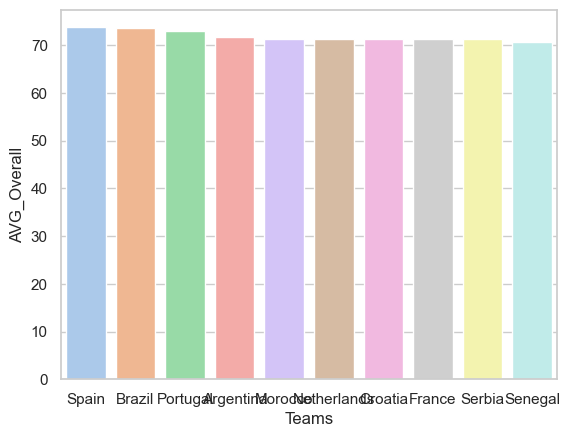

In [64]:
sns.barplot(df_average_overall[:10], x='Teams', y='AVG_Overall',
            palette=sns.color_palette('pastel'))

In [66]:
df = pd.read_csv('/Users/sonikakhanna/Downloads/players_22 - players_22.csv')

/var/folders/cf/6twhyzx56xj6q56wvg1n5qwm0000gn/T/ipykernel_87547/4157581080.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/sonikakhanna/Downloads/players_22 - players_22.csv')


In [67]:
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [70]:
df_clubs=df['club_name'].value_counts()

In [71]:
df_clubs

Paris Saint-Germain       33
RC Celta de Vigo          33
Everton                   33
Real Betis Balompié       33
Burnley                   33
                          ..
Bahia                     20
Clube Atlético Mineiro    20
Fluminense                20
Wellington Phoenix        19
Harrogate Town            19
Name: club_name, Length: 701, dtype: int64

<BarContainer object of 5 artists>

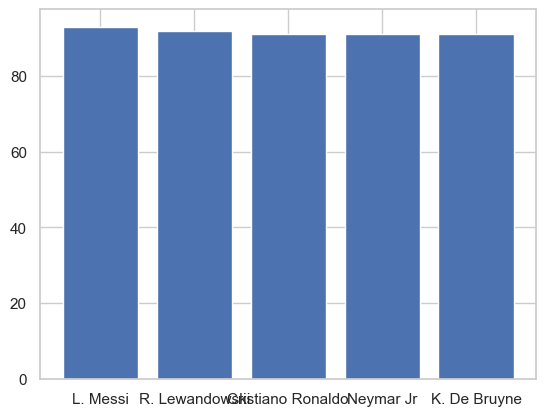

In [77]:
plt.bar(df['short_name'].head(),df['potential'].head())

In [ ]:
l.messi have highest potential

In [79]:
df.groupby('short_name').head().mean()['value_eur'].head().plot(kind='pie')

/var/folders/cf/6twhyzx56xj6q56wvg1n5qwm0000gn/T/ipykernel_87547/848880018.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.groupby('short_name').head().mean()['value_eur'].head().plot(kind='pie')


AttributeError: 'numpy.float64' object has no attribute 'head'

In [80]:
df[(df['player_positions'] == 'GK') & (df['club_name'] == 'Real Madrid CF')]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
12,192119,https://sofifa.com/player/192119/thibaut-court...,T. Courtois,Thibaut Courtois,GK,89,91,85500000.0,250000.0,29,...,29+3,29+3,29+3,29+3,86+3,https://cdn.sofifa.net/players/192/119/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
2386,243952,https://sofifa.com/player/243952/andriy-lunin/...,A. Lunin,Andriy Lunin,GK,74,85,8000000.0,59000.0,22,...,26+2,26+2,26+2,25+2,73+2,https://cdn.sofifa.net/players/243/952/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/ua.png
13354,264170,https://sofifa.com/player/264170/luis-federico...,Luis López,Luis Federico López Andúgar,GK,63,76,1000000.0,11000.0,20,...,20+2,20+2,20+2,18+2,62+2,https://cdn.sofifa.net/players/264/170/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/es.png


In [81]:
df_gk=df[(df['player_positions'] == 'GK') & (df['club_name'] != 'Real Madrid CF') & (df['age'] <= 26)]

In [82]:
df_gk

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
21,230621,https://sofifa.com/player/230621/gianluigi-don...,G. Donnarumma,Gianluigi Donnarumma,GK,89,93,119500000.0,110000.0,22,...,31+3,31+3,31+3,31+3,87+3,https://cdn.sofifa.net/players/230/621/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1343/60.png,https://cdn.sofifa.net/flags/it.png
127,215698,https://sofifa.com/player/215698/mike-maignan/...,M. Maignan,Mike Maignan,GK,84,89,49500000.0,45000.0,25,...,34+2,34+2,34+2,34+2,83+2,https://cdn.sofifa.net/players/215/698/22_120.png,https://cdn.sofifa.net/teams/47/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
243,211515,https://sofifa.com/player/211515/pierluigi-gol...,P. Gollini,Pierluigi Gollini,GK,82,87,35000000.0,48000.0,26,...,28+2,28+2,28+2,29+2,81+2,https://cdn.sofifa.net/players/211/515/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/it.png
267,230869,https://sofifa.com/player/230869/unai-simon-me...,Unai Simón,Unai Simón Mendibil,GK,82,86,34500000.0,24000.0,24,...,30+3,30+3,30+3,29+3,81+3,https://cdn.sofifa.net/players/230/869/22_120.png,https://cdn.sofifa.net/teams/448/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1362/60.png,https://cdn.sofifa.net/flags/es.png
282,241671,https://sofifa.com/player/241671/dominik-livak...,D. Livaković,Dominik Livaković,GK,82,87,35000000.0,1000.0,26,...,33+2,33+2,33+2,32+2,81+2,https://cdn.sofifa.net/players/241/671/22_120.png,https://cdn.sofifa.net/teams/211/60.png,https://cdn.sofifa.net/flags/hr.png,NaN,https://cdn.sofifa.net/flags/hr.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19210,261958,https://sofifa.com/player/261958/xiang-gao/220002,Gao Xiang,高翔,GK,48,54,60000.0,800.0,20,...,21+2,21+2,21+2,17+2,47+2,https://cdn.sofifa.net/players/261/958/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19216,263340,https://sofifa.com/player/263340/harvey-wiles-...,H. Wiles-Richards,Harvey Wiles-Richards,GK,48,65,110000.0,1000.0,19,...,20+2,20+2,20+2,19+2,47+2,https://cdn.sofifa.net/players/263/340/22_120.png,https://cdn.sofifa.net/teams/1919/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
19225,259213,https://sofifa.com/player/259213/dylan-da-silv...,D. Da Silva,Dylan Da Silva,GK,47,55,90000.0,500.0,21,...,19+2,19+2,19+2,18+2,46+2,https://cdn.sofifa.net/players/259/213/22_120.png,https://cdn.sofifa.net/teams/113298/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png
19227,259646,https://sofifa.com/player/259646/arsh-shaikh/2...,A. Shaikh,Arsh Shaikh,GK,47,67,110000.0,500.0,18,...,17+2,17+2,17+2,16+2,46+2,https://cdn.sofifa.net/players/259/646/22_120.png,https://cdn.sofifa.net/teams/113146/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png


In [83]:
top_diving=df_gk.sort_values('goalkeeping_diving', ascending=False)

In [84]:
top_diving['long_name'].head()

21          Gianluigi Donnarumma
363    Alejandro Remiro Gargallo
127                 Mike Maignan
243            Pierluigi Gollini
267          Unai Simón Mendibil
Name: long_name, dtype: object

<BarContainer object of 5 artists>

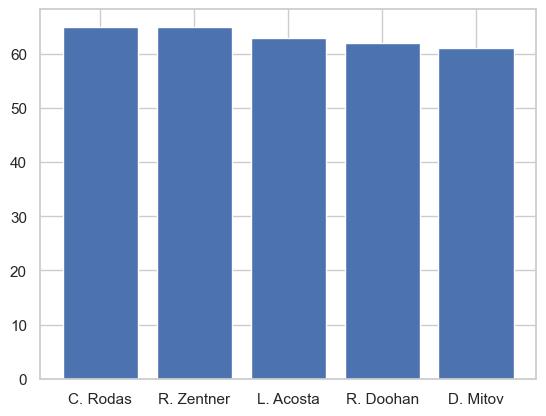

In [89]:
top_speed=df_gk.sort_values('goalkeeping_speed', ascending=False)
plt.bar(top_speed['short_name'].head(),top_speed['goalkeeping_speed'].head())

In [ ]:
Gianluigi Donnarumma has the best reflexes, he is the 4th best in goal keeping

In [92]:
df_df=df[(df['club_name'] != 'Real Madrid CF') & (df['age'] <= 26)]

<BarContainer object of 5 artists>

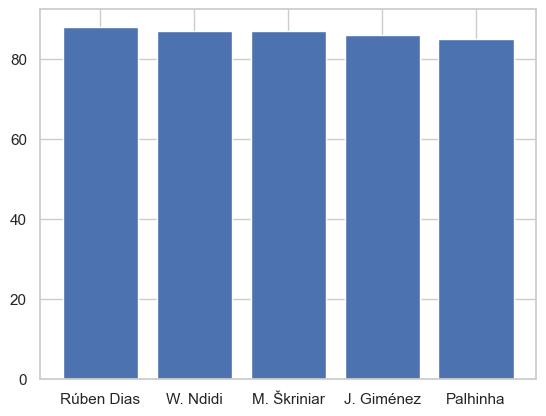

In [94]:
top_2=df_df.sort_values('defending', ascending=False)
plt.bar(top_2['short_name'].head(),top_2['defending'].head())

In [ ]:
Rúben Dias,W. Ndid is best defender

In [95]:
df_mid=df[(df['club_name'] != 'Real Madrid CF') & (df['age'] <= 26)]

<BarContainer object of 5 artists>

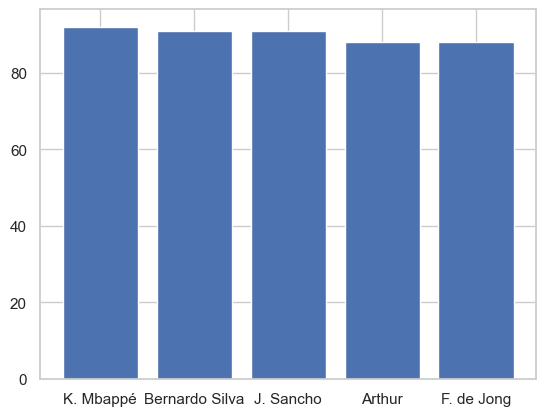

In [96]:
top_4=df_mid.sort_values('dribbling', ascending=False)
plt.bar(top_4['short_name'].head(),top_4['dribbling'].head())

In [ ]:
K Mbappe should be the mid fielder

In [97]:
df_att=df[(df['club_name'] != 'Real Madrid CF') & (df['age'] <= 26)]

<BarContainer object of 5 artists>

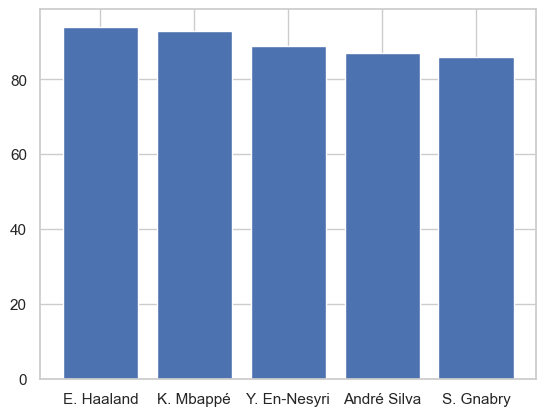

In [99]:
top_3=df_att.sort_values('attacking_finishing', ascending=False)
plt.bar(top_3['short_name'].head(),top_3['attacking_finishing'].head())

In [ ]:
e.haaland is the best attacker